Flickr API
====

In [39]:
!pip install flickrapi

In [40]:
from flickrapi import FlickrAPI

FLICKER_KEY = 
FLICKER_SECRET = 

flickr = FlickrAPI(FLICKER_KEY, FLICKER_SECRET, format='parsed-json')
extras = 'url_o' # bring original image
# extras = ['url_sq', 'url_t', 'url_s', 'url_q', 'url_m', 'url_n', 'url_z', 'url_c',
# 'url_l', 'url_o']

cats = flickr.photos.search(text='kitten', per_page=5, extras=extras)
photos = cats['photos']

from pprint import pprint # pretty print
pprint(photos)

{'page': 1,
 'pages': 34053,
 'perpage': 5,
 'photo': [{'farm': 66,
            'height_o': '3336',
            'id': '48748552576',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'owner': '92780912@N08',
            'secret': '63d9bf11cb',
            'server': '65535',
            'title': 'Schnuggi at the window.',
            'url_o': 'https://live.staticflickr.com/65535/48748552576_d5824d1ed8_o.jpg',
            'width_o': '2480'},
           {'farm': 66,
            'height_o': '2824',
            'id': '48747826683',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'owner': '57361659@N02',
            'secret': 'cd6f70f50a',
            'server': '65535',
            'title': 'Beautiful Kitty',
            'url_o': 'https://live.staticflickr.com/65535/48747826683_323acbc02a_o.jpg',
            'width_o': '2048'},
           {'farm': 66,
            'height_o': '2736',
            'id': '487

In [41]:
print(photos) # 쓰지 말자...

{'page': 1, 'pages': 34053, 'perpage': 5, 'total': '170263', 'photo': [{'id': '48748552576', 'owner': '92780912@N08', 'secret': '63d9bf11cb', 'server': '65535', 'farm': 66, 'title': 'Schnuggi at the window.', 'ispublic': 1, 'isfriend': 0, 'isfamily': 0, 'url_o': 'https://live.staticflickr.com/65535/48748552576_d5824d1ed8_o.jpg', 'height_o': '3336', 'width_o': '2480'}, {'id': '48747826683', 'owner': '57361659@N02', 'secret': 'cd6f70f50a', 'server': '65535', 'farm': 66, 'title': 'Beautiful Kitty', 'ispublic': 1, 'isfriend': 0, 'isfamily': 0, 'url_o': 'https://live.staticflickr.com/65535/48747826683_323acbc02a_o.jpg', 'height_o': '2824', 'width_o': '2048'}, {'id': '48748111971', 'owner': '81607599@N00', 'secret': '2036bf4339', 'server': '65535', 'farm': 66, 'title': 'Late night TV with Piper...', 'ispublic': 1, 'isfriend': 0, 'isfamily': 0, 'url_o': 'https://live.staticflickr.com/65535/48748111971_469d9a2d1d_o.jpg', 'height_o': '2736', 'width_o': '3648'}, {'id': '48747697118', 'owner': '8

In [42]:
# parsing 하는 방법
print(cats['photos']['page'])

1


In [ ]:
# import the necessary packages
import numpy as np
import urllib
import cv2

def url_to_image(url):
  # download the image convert it to a Numpy array, and then read
  # it into opencv format
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype='uint8') # 8바이트씩 읽어와서 array로 바꿈
  image =  cv2.imdecode(image, cv2.IMREAD_COLOR)
  
  return image

downloading https://live.staticflickr.com/65535/48747826683_323acbc02a_o.jpg


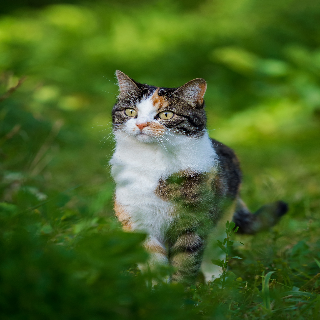

downloading https://live.staticflickr.com/65535/48748111971_469d9a2d1d_o.jpg


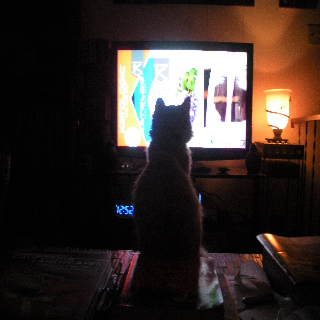

downloading https://live.staticflickr.com/65535/48747697118_aaa41c207d_o.jpg


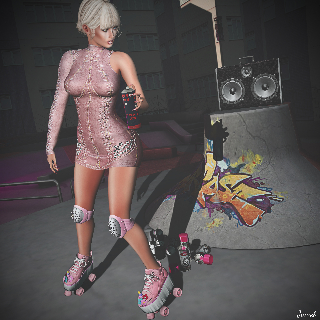

In [44]:
from google.colab.patches import cv2_imshow

# initialize the list of image URLs to download
urls = [
    'https://live.staticflickr.com/65535/48747826683_323acbc02a_o.jpg',
    'https://live.staticflickr.com/65535/48748111971_469d9a2d1d_o.jpg',
    'https://live.staticflickr.com/65535/48747697118_aaa41c207d_o.jpg',
]

# loop over the image URLs
for url in urls:
  # download the image URL and display it
  print('downloading %s' %(url))
  image = url_to_image(url)
  image = cv2.resize(image, (320, 320))
  cv2_imshow(image)

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


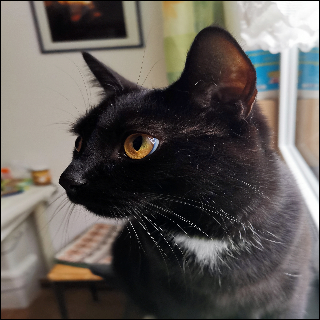

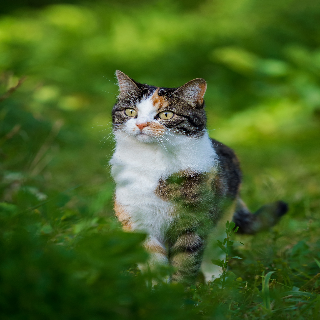

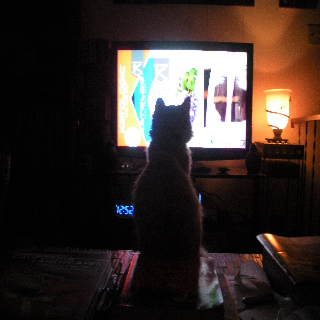

In [46]:
# google drive에 저장하기
from google.colab.patches import cv2_imshow

for i in range(3):
  image_original_url = photos['photo'][i]['url_o']
  image_temp = url_to_image(image_original_url)
  file_name = '/content/drive/My Drive/Colab Notebooks/koipa/cats_{}.jpg'.format(i)
  cv2.imwrite(file_name, image_temp)
  image_temp = cv2.resize(image_temp, (320, 320))
  cv2_imshow(image_temp)

In [47]:
print(image_temp.shape) # image shape 출력

(320, 320, 3)


In [ ]:
# CNN model에 train하기 위해 image size를 똑같이 맞춰줄 필요가 있다.
def image_resize(image, x, y):
  return cv2.resize(image, (x,y))

(224, 224, 3)


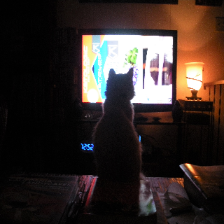

In [57]:
resized = image_resize(image_temp, 224, 224)

print(resized.shape)
cv2_imshow(resized)

In [50]:
# CNN model input shape : (Batch, Width, Height, Channel)
# Batch : 한 번에 학습할 사진의 수
# train하기 위해 dimension을 추가
resized = np.expand_dims(resized, axis=0)

print(resized.shape)

(1, 224, 224, 3)


VGG Application
====

In [ ]:
from keras.applications.vgg16 import VGG16

model = VGG16()

In [52]:
# batch가 몇 개 들어올 줄 모르므로 batch size 부분이 None으로 채워져 있음
model.summary() 

# 1000개의 범주로 분류하기 때문에 마지막 neuron의 수는 1000, softmax 함수 사용함
# 3 x 3 x 64개의 weight + 64개의 bias = 1792 params

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

(224, 224, 3)


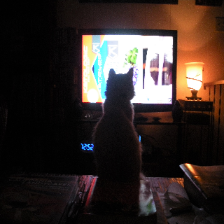

In [59]:
resized_image = cv2.resize(image_temp, (224, 224))
print(resized_image.shape)
cv2_imshow(resized_image)

In [60]:
resized_image = np.expand_dims(resized_image, axis=0)
print(resized_image.shape)

(1, 224, 224, 3)


In [ ]:
# 이미지에 대한 예측값 
# 배열 형태로 나옴.... -> label 형식으로 바꿔줘야 함
yhat = model.predict(resized_image)

In [63]:
# vgg16 : 특징 추출기, 어떠한 사진을 넣어도 특징을 잘 추출함 
# 특징 추출기 + 분류기
# 분류기를 구현할 때 특징 추출기는 그대로 냅두고 분류기만 바꾸는 것을 추천
from keras.applications.vgg16 import decode_predictions

label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2] * 100))

television (29.64%)


VGG 4 Small dataset
======